<a href="https://colab.research.google.com/github/Allzer/Neural-networks-on-Python/blob/main/8_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [40]:
#Просто загружаем данные
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255 #Т.к изображение ЧБ, то после такого преобразование белый - 1, чёрный - 0
x_test = x_test/255

y_train_cat = keras.utils.to_categorical(y_train, 10) #Преобразовали данные в векторы. Там, где нужная цифра по счёту, будет стоять 1
y_test_cat = keras.utils.to_categorical(y_test, 10)

Проверяем DropOut

In [41]:
#Разделяем данные так, чтобы было переобучение
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

In [42]:
model = keras.Sequential([Flatten(input_shape=(28,28,1)),
                          Dense(200,activation='relu'),
                          BatchNormalization(),
                          Dense(10,activation="softmax")])
#Слой Flatten нужен для сглаживания входного тензора, сохраняя при этом ось пакета (ось 0).
#Это означает, что он преобразует входной тензор из многомерного тензора в одномерный тензор
#print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/7
1600/1600 [==============================] - 7s 3ms/step - loss: 0.2369 - accuracy: 0.9301 - val_loss: 0.1367 - val_accuracy: 0.9592
Epoch 2/7
1600/1600 [==============================] - 4s 3ms/step - loss: 0.1179 - accuracy: 0.9649 - val_loss: 0.1055 - val_accuracy: 0.9683
Epoch 3/7
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.1034 - val_accuracy: 0.9700
Epoch 4/7
1600/1600 [==============================] - 4s 3ms/step - loss: 0.0747 - accuracy: 0.9766 - val_loss: 0.0999 - val_accuracy: 0.9709
Epoch 5/7
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.1046 - val_accuracy: 0.9698
Epoch 6/7
1600/1600 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9830 - val_loss: 0.0962 - val_accuracy: 0.9725
Epoch 7/7
1600/1600 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.0981 - val_accuracy: 0.9748

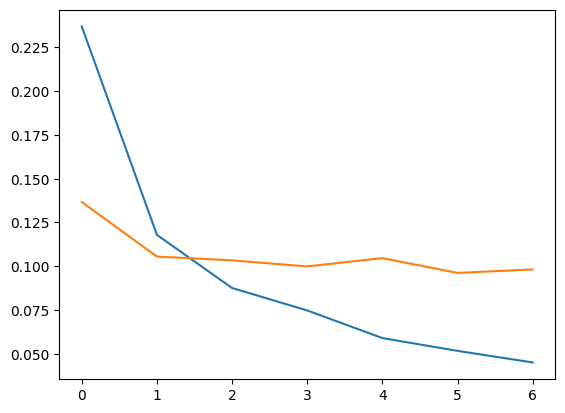

In [43]:
his = model.fit(x_train, y_train_cat, batch_size=30, epochs=7, validation_split=0.2)
#Строим графики валидации и лоса
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()
#Как видно из графиков, эффект переобучения снижен

In [36]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9792


[0.06569961458444595, 0.979200005531311]

In [ ]:
n = 0
x = np.expand_dims(x_test[n],axis=0) #Создаём 3-мерный тензор
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}') #Выбирает наибольший  индекс

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[0:20])
print(y_test[:20])

mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

Вывод 5 первых неваерных результатов

In [ ]:
for i in range(5):
  print("Значение сети: "+str(p_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()